In [1]:
import pandas as pd
import umap
import umap.plot
import hdbscan

# Used to get the data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Some plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

Loading BokehJS ...

In [2]:
from textmap.vectorizers import DocVectorizer

/home/jupyter/TextMAP/textmap/tokenizers.py:14: UserWarning: The stanza library could not be imported StanzaTokenizer will not be available.
  warn("The stanza library could not be imported StanzaTokenizer will not be available.")


### Get the data

In [3]:
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [4]:
category_labels = [dataset.target_names[x] for x in dataset.target]
hover_df = pd.DataFrame(category_labels, columns=['category'])

### Try DocVectorizer

In [5]:
%%time
vectorizer = DocVectorizer()
word_doc_matrix = vectorizer.fit_transform(dataset.data)

CPU times: user 2min 41s, sys: 1.54 s, total: 2min 43s
Wall time: 2min 41s


In [6]:
word_doc_matrix

<18846x1121488 sparse matrix of type '<class 'numpy.float32'>'
	with 2330761 stored elements in Compressed Sparse Row format>

In [7]:
%%time
embedding = umap.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix)

/opt/conda/envs/covid19-kaggle/lib/python3.8/site-packages/pynndescent/sparse_nndescent.py:502: NumbaTypeSafetyWarning: unsafe cast from uint32 to int32. Precision may be lost.
  init_rp_tree(inds, indptr, data, dist, current_graph, leaf_array)
/opt/conda/envs/covid19-kaggle/lib/python3.8/site-packages/pynndescent/pynndescent_.py:1011: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  warn(


CPU times: user 3min 46s, sys: 460 ms, total: 3min 46s
Wall time: 46.3 s


In [8]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit_predict(embedding.embedding_)
labels = clusterer.labels_

hover_df['cluster'] = labels

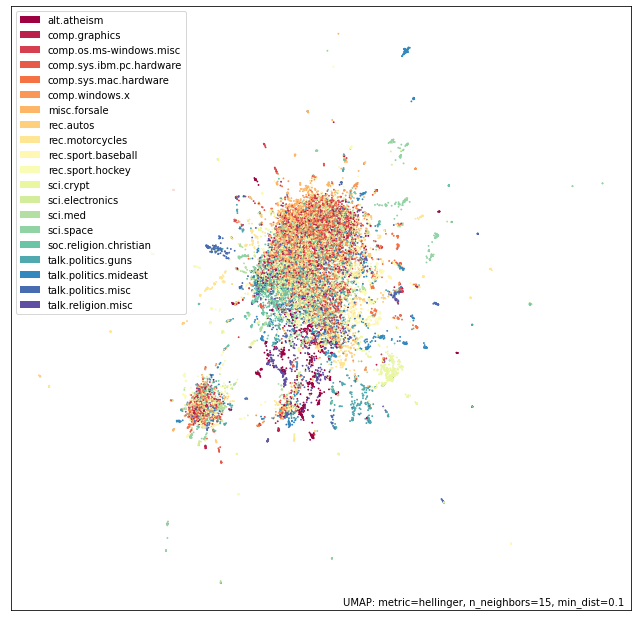

In [18]:
# f = umap.plot.interactive(embedding, labels=dataset.target, hover_data=hover_df, point_size=1)
# show(f)
f = umap.plot.points(embedding, labels=hover_df['category'])

### Now let's compare to TfidfVectorizer

In [10]:
%%time
tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
word_doc_matrix_tfidf = tfidf_vectorizer.fit_transform(dataset.data)

CPU times: user 4.43 s, sys: 56 ms, total: 4.49 s
Wall time: 4.49 s


In [11]:
%%time
embedding_tfidf = umap.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix_tfidf)

CPU times: user 3min 5s, sys: 300 ms, total: 3min 6s
Wall time: 27.7 s


In [12]:
category_labels = [dataset.target_names[x] for x in dataset.target]
hover_df_tfidf = pd.DataFrame(category_labels, columns=['category'])

In [13]:
clusterer_tfidf = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer_tfidf.fit_predict(embedding.embedding_)
labels_tfidf = clusterer.labels_
hover_df_tfidf['cluster'] = labels

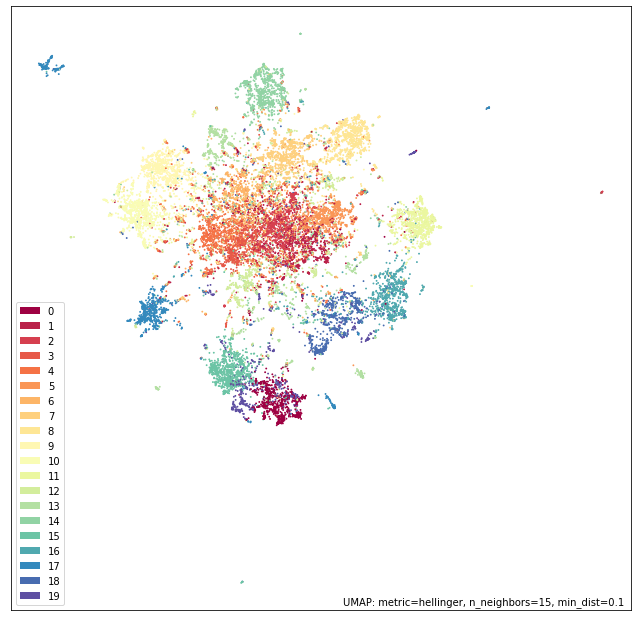

In [17]:
# fig = umap.plot.interactive(embedding_tfidf, labels=dataset.target, hover_data=hover_df_tfidf, point_size=1)
# show(fig)
fig = umap.plot.points(embedding_tfidf, labels=dataset.target)